In [1]:
"""
Feb 26, 2020

A Machine Learning Algorithm called Long Short Term Memory

"""

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from psequant import get_pse_data # pse data

import math
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Using TensorFlow backend.


In [2]:
# Ticker Symbol
stock = "SMPH"

# Date format (yyyy-mm-dd)
beg_date = "2016-01-01"
end_date = "2020-01-01"

df = get_pse_data(stock, beg_date, end_date)
print(df.head())

Stock table exists!
Reading stock_table.csv ...
             open   high    low  close        value
dt                                                 
2016-01-04  21.85  21.85  21.05  21.35  184891005.0
2016-01-05  21.30  21.85  20.90  21.55  170322150.0
2016-01-06  21.55  21.75  21.20  21.20  256173285.0
2016-01-07  21.60  21.60  20.50  20.50  266026950.0
2016-01-08  20.05  21.10  20.05  20.60  296123935.0


In [3]:
df.shape

(976, 5)

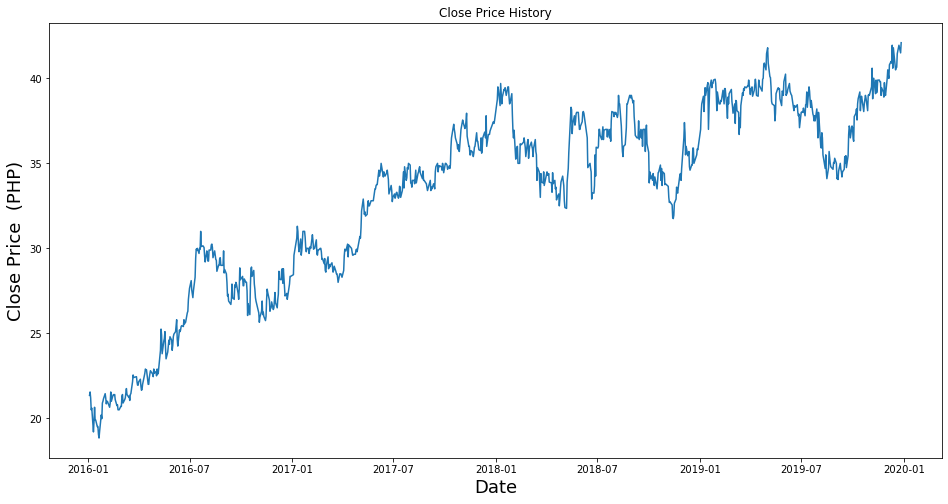

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price  (PHP)', fontsize = 18)
plt.show()

In [5]:
# Create a new dataframe with only the 'close' column
data = df.filter(['close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number ofrows to train the model on
training_data_len  = math.ceil(len(dataset) * .8)
print(training_data_len)

781


In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.10791058]
 [0.11650903]
 [0.10146174]
 [0.07136715]
 [0.07566638]
 [0.01547721]
 [0.04213242]
 [0.07781599]
 [0.0455718 ]
 [0.0455718 ]
 [0.02837489]
 [0.02923474]
 [0.0094583 ]
 [0.        ]
 [0.01633706]
 [0.05846948]
 [0.04901118]
 [0.08856406]
 [0.09286328]
 [0.09931212]
 [0.1122098 ]
 [0.10146174]
 [0.08641445]
 [0.09286328]
 [0.09286328]
 [0.07781599]
 [0.08856406]
 [0.11650903]
 [0.09286328]
 [0.10791058]
 [0.11006019]
 [0.10791058]
 [0.11006019]
 [0.09716251]
 [0.08211522]
 [0.08426483]
 [0.07136715]
 [0.07136715]
 [0.07996561]
 [0.07996561]
 [0.10576096]
 [0.11006019]
 [0.08856406]
 [0.09716251]
 [0.10146174]
 [0.1122098 ]
 [0.12510748]
 [0.11006019]
 [0.10361135]
 [0.10576096]
 [0.0950129 ]
 [0.11006019]
 [0.1122098 ]
 [0.14230439]
 [0.15950129]
 [0.15305245]
 [0.15520206]
 [0.14230439]
 [0.13370593]
 [0.13370593]
 [0.14230439]
 [0.14875322]
 [0.13155632]
 [0.12080825]
 [0.12295787]
 [0.13585555]
 [0.15735168]
 [0.16380052]
 [0.17454858]
 [0.17239897]
 [0.17239897]
 [0.13

In [7]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Sprint the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.10791058, 0.11650903, 0.10146174, 0.07136715, 0.07566638,
       0.01547721, 0.04213242, 0.07781599, 0.0455718 , 0.0455718 ,
       0.02837489, 0.02923474, 0.0094583 , 0.        , 0.01633706,
       0.05846948, 0.04901118, 0.08856406, 0.09286328, 0.09931212,
       0.1122098 , 0.10146174, 0.08641445, 0.09286328, 0.09286328,
       0.07781599, 0.08856406, 0.11650903, 0.09286328, 0.10791058,
       0.11006019, 0.10791058, 0.11006019, 0.09716251, 0.08211522,
       0.08426483, 0.07136715, 0.07136715, 0.07996561, 0.07996561,
       0.10576096, 0.11006019, 0.08856406, 0.09716251, 0.10146174,
       0.1122098 , 0.12510748, 0.11006019, 0.10361135, 0.10576096,
       0.0950129 , 0.11006019, 0.1122098 , 0.14230439, 0.15950129,
       0.15305245, 0.15520206, 0.14230439, 0.13370593, 0.13370593])]
[0.14230438521066202]

[array([0.10791058, 0.11650903, 0.10146174, 0.07136715, 0.07566638,
       0.01547721, 0.04213242, 0.07781599, 0.0455718 , 0.0455718 ,
       0.02837489, 0.02923474, 0.00

In [8]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(721, 60, 1)

In [10]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
721/721 [==============================] - 19s 26ms/step - loss: 0.0064


In [13]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data ets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [15]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

0.870547547828003


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


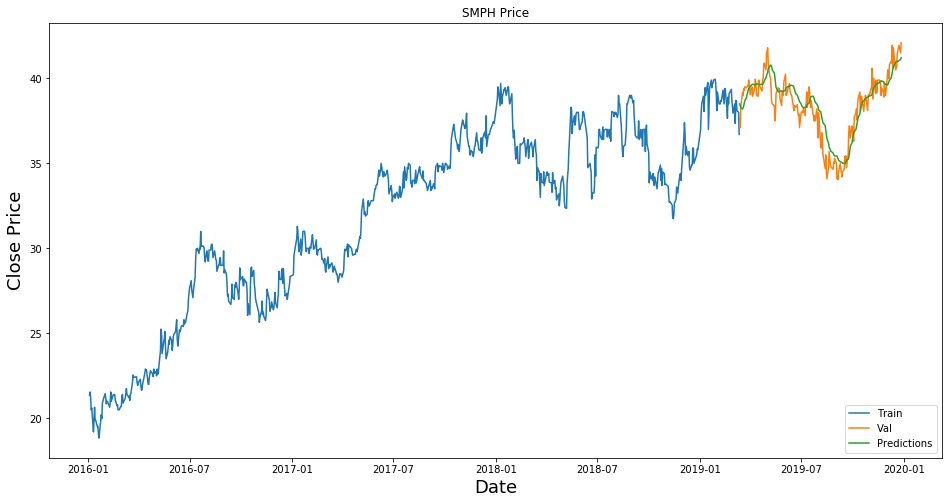

In [18]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('SMPH Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [19]:
#Show the valid and predicted prices
valid

,close,Predictions
dt,,
2019-03-13,37.65,38.498241
2019-03-14,37.10,38.383659
2019-03-15,38.40,38.247639
2019-03-18,39.15,38.204887
2019-03-19,39.00,38.265755
...,...,...
2019-12-19,40.65,41.001953
2019-12-20,41.45,40.994217
2019-12-23,41.95,41.032978


In [20]:
smph_quote = get_pse_data("SMPH", "2016-01-01", "2020-01-01")
#Create a new dataframe
new_df = smph_quote.filter(['close'])
#Get the last 60 day closing price values and conver the data fram to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Converst the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

Stock table exists!
Reading stock_table.csv ...
[[41.329865]]


In [21]:
smph_quote = get_pse_data("SMPH", "2020-01-02", "2020-01-02")
print(smph_quote['close'])

Stock table exists!
Reading stock_table.csv ...
dt
2020-01-02    42.25
Name: close, dtype: float64
